In [5]:
%matplotlib notebook

Similar to first figure, show examples of trajectories.

In [6]:
from pathlib import Path 
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

# Statistics:
from scipy import stats
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
import statsmodels.api as sm

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=18)

# Import shared_functions
import sys
import os

sys.path.insert(0, str(Path(os.getcwd()).parent))
import shared_functions

In [7]:
black_background = False # black background for slides
if black_background:
    plt.style.use('dark_background') 

In [10]:
#savepath = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\plots\\Fig2\\trajectories')
savepath = 'Declare path' # and change SAVE_PLOT variable in shared_functions.py
root_path = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\all_data\\Behavior')
#savepath_SI = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\plots\\Fig2\\SI')
savepath_SI = 'Declare path' # and change SAVE_PLOT variable in shared_functions.py
#savepath_for_stats = Path('G:\\Shared drives\\LouisLab COLLABORATIVE Vanishing Spikes\\stats_files')
savepath_for_stats = 'Declare path' # and change SAVE_PLOT variable in shared_functions.py

# UAS-Or42b, T17/T32, EtB 1:25

<IPython.core.display.Javascript object>


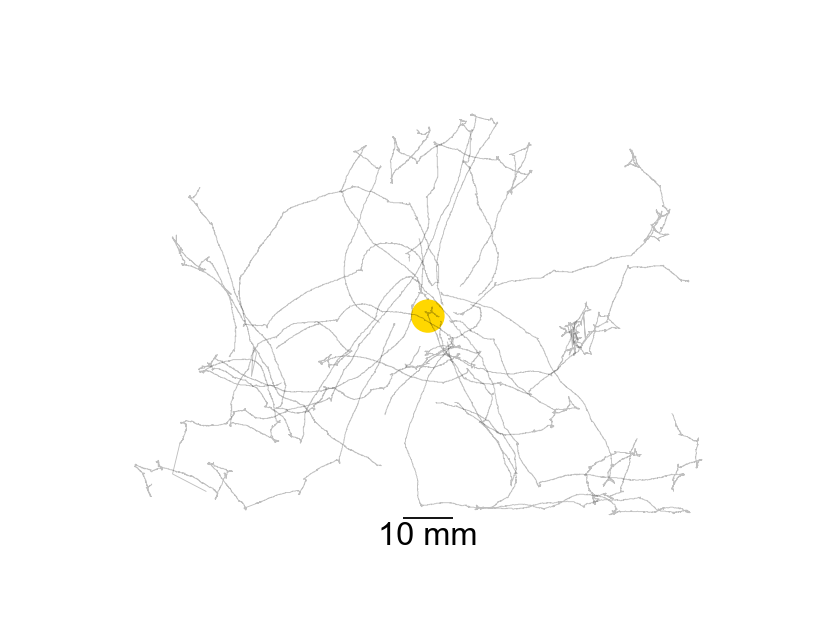

In [11]:
etb_300mM_OrcoNULL3_path = Path(root_path, 'EtB\\EtB 300mM\\Orco null (MS461xMS42)')

OrcoNULL_300mMEtB_centroid, OrcoNULL_300mMEtB_source, \
    OrcoNULL_300mMEtB_dst, res, px_per_mm, OrcoNULL_300mMEtB_fps = shared_functions.collect_data(
        etb_300mM_OrcoNULL3_path)

shared_functions.plot_trajectories(OrcoNULL_300mMEtB_centroid, OrcoNULL_300mMEtB_source, 
                                   Path(savepath, 'Fig2_EtB_300mM_OrcoNULL3.svg'), 
                                   'k', res, px_per_mm, OrcoNULL_300mMEtB_fps,
                                   savepath=savepath_SI)

# Or1a SF, no odor

<IPython.core.display.Javascript object>


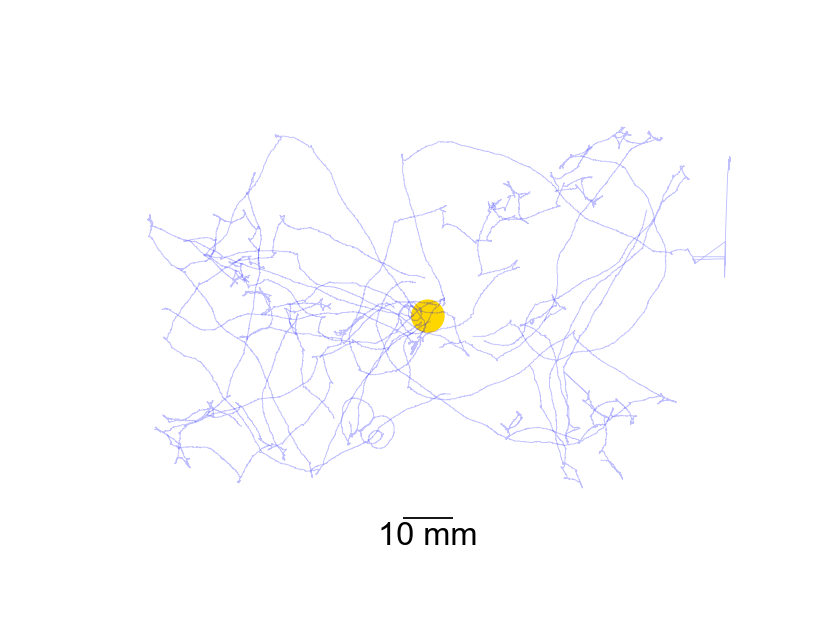

In [12]:
etb_noOdor_Or1aSF_path = Path(root_path, 'no odor\\Or1a SF (MS53xMS133)')

Or1aSF_noOdor_centroid, Or1aSF_noOdor_source, \
    Or1aSF_noOdor_dst, res, px_per_mm, Or1aSF_noOdor_fps = shared_functions.collect_data(etb_noOdor_Or1aSF_path)

shared_functions.plot_trajectories(Or1aSF_noOdor_centroid, Or1aSF_noOdor_source, 
                                   Path(savepath, 'Fig2_EtB_noOdor_Or1aSF.svg'),
                                   'blue', res, px_per_mm, Or1aSF_noOdor_fps,
                                   savepath=savepath_SI)

# Or1aSF > UAS-Or42b, no Odor

<IPython.core.display.Javascript object>


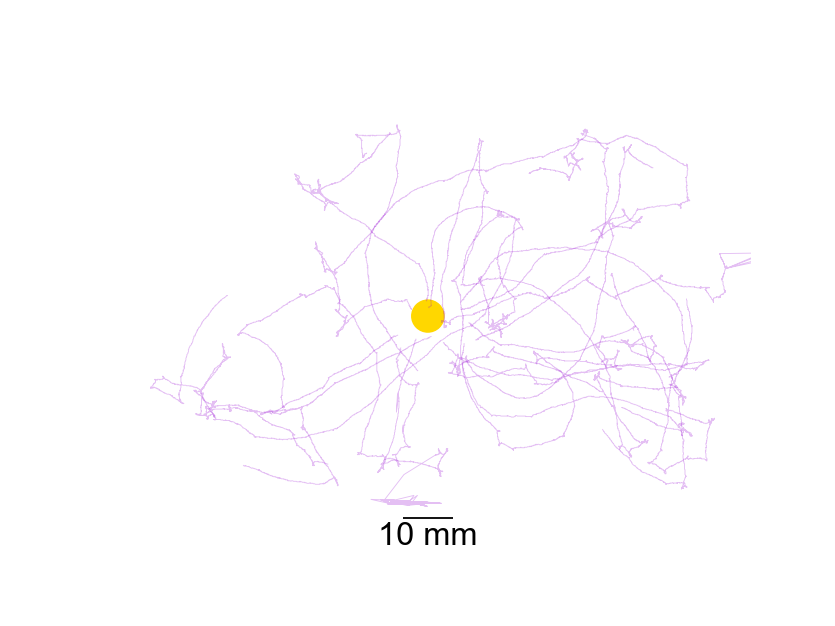

In [13]:
etb_noOdor_Or1aSFOr42b_path = Path(root_path, 'no odor\\Or1a-Gal4, UAS-Or42b (MS53xMS461)')

Or1aSFUASOr42b_noOdor_centroid, Or1aSFUASOr42b_noOdor_source, \
    Or1aSFUASOr42b_noOdor_dst, res, px_per_mm, Or1aSFUASOr42b_noOdor_fps = shared_functions.collect_data(
    etb_noOdor_Or1aSFOr42b_path)

shared_functions.plot_trajectories(Or1aSFUASOr42b_noOdor_centroid, Or1aSFUASOr42b_noOdor_source, 
                                   Path(savepath, 'Fig2_noOdor_Or1aSFUASOr42b.svg'), 
                                   'darkviolet', res, px_per_mm, Or1aSFUASOr42b_noOdor_fps,
                                  savepath=savepath_SI)

All files have 20.0 fps
All files have 20.0 fps
All files have 20.0 fps


<IPython.core.display.Javascript object>


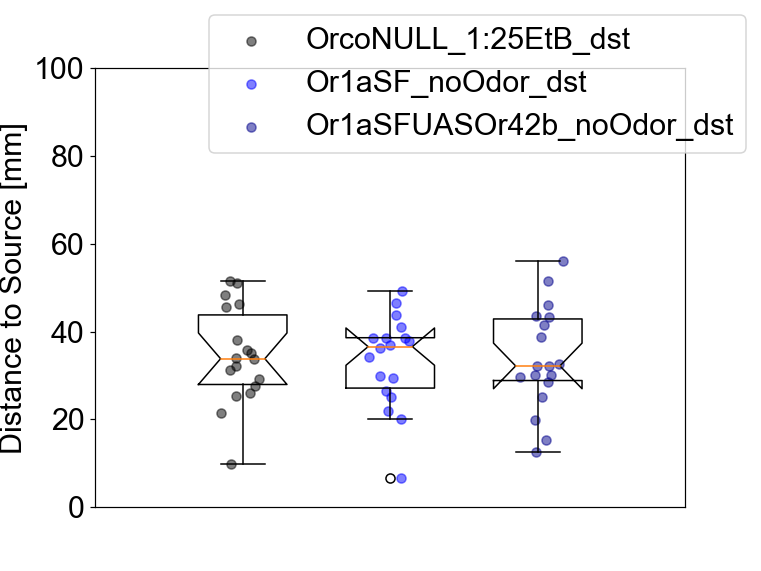

lilliefors (0.15508838610853642, 0.3003687189004224)
lilliefors (0.1608433567311771, 0.24476903703469738)
lilliefors (0.12171276072194659, 0.673650891838705)
levene LeveneResult(statistic=0.11487480091491063, pvalue=0.8917077576985056)


F_onewayResult(statistic=0.05144002370723427, pvalue=0.9499098348906614)


                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
          group1                 group2        meandiff p-adj  lower  upper  reject
-----------------------------------------------------------------------------------
Or1aSFUASOr42b_noOdor_dst    Or1aSF_noOdor_dst    -0.44   0.9  -9.391  8.511  False
Or1aSFUASOr42b_noOdor_dst OrcoNULL_1:25EtB_dst   0.7369   0.9 -8.2141  9.688  False
        Or1aSF_noOdor_dst OrcoNULL_1:25EtB_dst   1.1769   0.9 -7.7741 10.128  False
-----------------------------------------------------------------------------------


In [8]:
data_ctr = [OrcoNULL_300mMEtB_dst,
            Or1aSF_noOdor_dst,
            Or1aSFUASOr42b_noOdor_dst
            ]
label_ctr = ['OrcoNULL_1:25EtB_dst',
             'Or1aSF_noOdor_dst',
             'Or1aSFUASOr42b_noOdor_dst'
             ]
colors = ['k',
          'b',
          'darkblue'
          #'cyan'
         ]
framerate = [20, 20, 20, 20]

shared_functions.doublecheck_fps(OrcoNULL_300mMEtB_fps)
shared_functions.doublecheck_fps(Or1aSF_noOdor_fps)
shared_functions.doublecheck_fps(Or1aSFUASOr42b_noOdor_fps)


df_for_stats_ctr = shared_functions.plot_DST_boxplot(data_ctr, label_ctr, colors, framerate)

shared_functions.calc_stats_multiple(df_for_stats_ctr, parametric=True)

# Export stats

In [9]:
# Before calling export_statitics, make sure all names are properly renamed

corrected_group_names = []

for current_data in [df_for_stats_ctr]:
    labels = current_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(labels)
    
    temp_data = current_data.replace(
        ['Or1aSFUASOr42b_noOdor_dst', 'Or1aSF_noOdor_dst', 'OrcoNULL_300mMEtB_dst'],
        ['Or1a>Or42b SF, no Odor', 'Or1aSF, no Odor', 'Orco-/-, 1:25']
        )
    
    corrected_group_names.append(temp_data)
    
    new_labels = temp_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(new_labels)

0     Or1aSFUASOr42b_noOdor_dst
18            Or1aSF_noOdor_dst
36         OrcoNULL_1:25EtB_dst
Name: Group, dtype: object
0     Or1a>Or42b SF, no Odor
18           Or1aSF, no Odor
36      OrcoNULL_1:25EtB_dst
Name: Group, dtype: object


In [12]:
shared_functions.export_statistics_multiple(corrected_group_names[0],
                                            savepath=savepath_for_stats, 
                                            savename='Fig2SIc', parametric=True)

['Or1a>Or42b SF, no Odor', 'Or1aSF, no Odor', 'OrcoNULL_1:25EtB_dst']
                    Group   n       mean     median        STD       SEM  \
0  Or1a>Or42b SF, no Odor  18  33.818349  32.165807  11.477728  0.637652   
1         Or1aSF, no Odor  18  33.378363  36.559523  10.214486  0.567471   
2    OrcoNULL_1:25EtB_dst  18  34.555292  33.810856  10.702342  0.594575   

                        95% CI on the mean statistical test  F statistic  \
0  (27.945132950416845, 39.69156444056036)            ANOVA      0.05144   
1   (28.151554531722503, 38.6051705817351)             <NA>          NaN   
2   (29.07884486658011, 40.03173851075074)             <NA>          NaN   

   p value significant effect size: eta^2  
0  0.94991          NO                N/A  
1      NaN         NaN                NaN  
2      NaN         NaN                NaN  




<IPython.core.display.Javascript object>


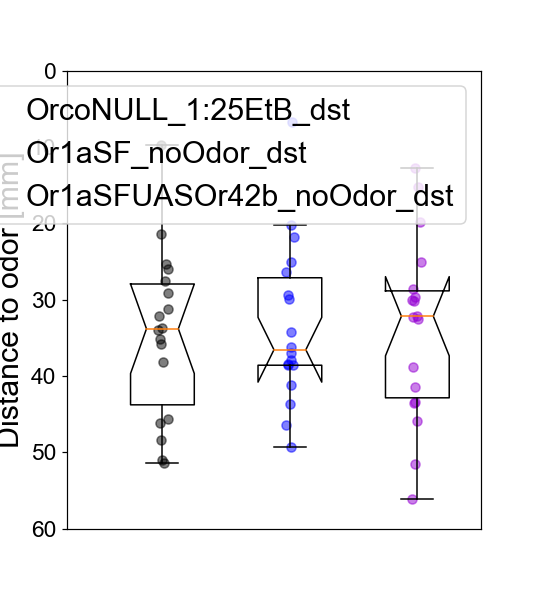

0
1
2


In [13]:
# This is a nested list!
data_to_plot = [df_for_stats_ctr,
    ]

labels_to_plot = [
    label_ctr
]

color = ['k',
        'b',
        'darkviolet']

boxplot_width=(0.5)
ylim = (0,60)

fig = plt.figure(figsize = ((3)*1.5,5))
ax = fig.add_subplot(111)

for i, current_data in enumerate(data_to_plot):

    for counter, current_label in enumerate(labels_to_plot[i]):

        x_position = counter * 1

        print(x_position) # keep for debugging

        current_data_to_plot = current_data[current_data['Group'] == current_label]['median_DTS']

        ax.boxplot(current_data_to_plot,
                   positions=[x_position], 
                   notch=True, 
                   showfliers=False,
                   widths=boxplot_width)

        x_scatter = np.random.normal(x_position, 0.02, size=current_data_to_plot.shape[0])

        ax.scatter(x_scatter, current_data_to_plot, c=color[counter], alpha=0.5, label=current_label)


ax.set_xlim(-0.75, x_position + 0.5)
ax.set_ylabel('Distance to odor [mm]', size=20)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.yaxis.set_tick_params(labelsize=15)
if ylim is not None:
    ax.set_ylim(ylim)

ax.invert_yaxis()
ax.legend()

#fig.savefig(Path(savepath_SI, 'Fig2SI_EtB300mM_ctr_Boxplots.svg'))

<IPython.core.display.Javascript object>


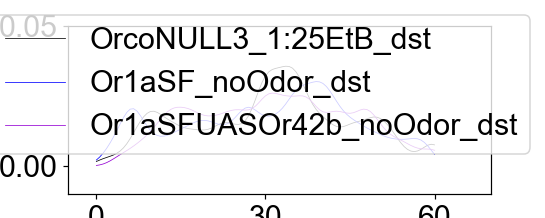

In [18]:
shared_functions.estimate_PDF(OrcoNULL_300mMEtB_dst, OrcoNULL_300mMEtB_fps, 'OrcoNULL3_1:25EtB_dst',
                              Or1aSF_noOdor_dst, Or1aSF_noOdor_fps, 'Or1aSF_noOdor_dst',
                              Or1aSFUASOr42b_noOdor_dst, Or1aSFUASOr42b_noOdor_fps, 'Or1aSFUASOr42b_noOdor_dst',
                              savename=Path(savepath_SI, 'Fig2SI_EtB300mM_ctr3_hist.svg'),
                              color1='k',
                              color2='blue',
                              color3='darkviolet',
                              ylim=(-0.01, 0.050),
                              second_linestyle = 'solid',
                              third_linestype = 'solid',
         )